In [1]:
from vif.falcon.oracle.guided_oracle.expressions import (
    OracleExpression,
    angle,
    aligned,
    color,
    count,
    mirrored,
    placement,
    position,
    size,
    shape,
    within,
)


/home/creux/Documents/AI/VIFagent/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import openai
from vif.models.detection import BoundingBox, SegmentationMask
from vif.utils.detection_utils import get_bounding_boxes, get_segmentation_masks
import sys
from loguru import logger
import os
from google import genai
from google.genai import types as genTypes
from datasets import load_dataset
from PIL import Image

used_model = "qwen/qwen3-vl-8b-instruct"

gclient = genai.Client(
    api_key=os.environ.get("GOOGLE_API_KEY"),
    http_options=genTypes.HttpOptions(api_version="v1alpha"),
)
client = openai.Client(
    base_url="https://openrouter.ai/api/v1",
    api_key=os.environ.get("OPENROUTER_API_KEY"),
)
from vif.falcon.oracle.guided_oracle.guided_code_oracle import OracleGuidedCodeModule


or_module: OracleGuidedCodeModule = OracleGuidedCodeModule(
    model=None, client=None, visual_client=gclient, property_model=used_model,property_client=client
)

2025-11-19 11:15:39.658 | INFO     | vif.utils.caching:instantiate_cache:26 - seg_cache cache loaded


In [3]:
logger.configure(handlers=[{"sink": sys.stdout, "level": "INFO"}])
veritikz_dataset = load_dataset("CharlyR/VeriTikz", "full", split="train")
i=0

In [4]:
i =9

Add another interval L2, going from the end of b1 to the end of b3.
True


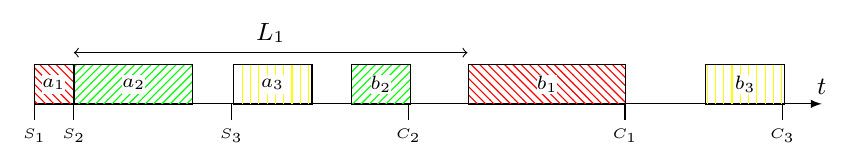

In [5]:
row = veritikz_dataset[i]

perfect_image = row["theoretical_perfect_image"]
original_image = row["original_image"]
sol_image = row["solution_image"]

print(row["instruction"])
print(row["expected"])
display(original_image)
#i+=1 

In [6]:
from vif.falcon.oracle.guided_oracle.expressions import present


def test_valid_customization() -> bool:
        return size("L2 interval",(1.2,1.2))
import inspect


def get_or_code(instruction,image):
        
        return inspect.getsource(test_valid_customization),None

or_module.get_oracle_code = get_or_code

In [7]:
oracle_method,usage = or_module.get_oracle(row["instruction"],original_image)

2025-11-19 11:15:42.138 | INFO     | vif.falcon.oracle.guided_oracle.guided_code_oracle:get_oracle:133 - Creating Oracle for instruction Add another interval L2, going from the end of b1 to the end of b3.
2025-11-19 11:15:42.140 | INFO     | vif.falcon.oracle.guided_oracle.guided_code_oracle:get_oracle:154 - Oracle created: def test_valid_customization() -> bool:
        return size("L2 interval",(1.2,1.2))



In [10]:


orac_res = oracle_method(sol_image)


2025-11-19 11:16:09.013 | INFO     | vif.utils.detection_utils:get_bounding_boxes:121 - Getting boxe for feature : L2 interval
2025-11-19 11:16:09.014 | INFO     | vif.utils.detection_utils:get_bounding_boxes:135 - video_metadata=None thought=None inline_data=None file_data=None thought_signature=None code_execution_result=None executable_code=None function_call=None function_response=None text='Detect the L2 interval, if present. Output a json list where each entry contains the 2D bounding box in "box_2d" and the label in "label". If not present, return an empty json list.'
2025-11-19 11:16:10.255 | INFO     | vif.utils.detection_utils:get_bounding_boxes:152 - LLM segmentation response: I'm unable to find the specified objects in this image.
2025-11-19 11:16:10.258 | WARNING  | vif.utils.detection_utils:log_and_append_token_data:334 - Error while parsing :I'm unable to find the specified objects in this image.
2025-11-19 11:16:10.264 | INFO     | vif.utils.detection_utils:get_bounding

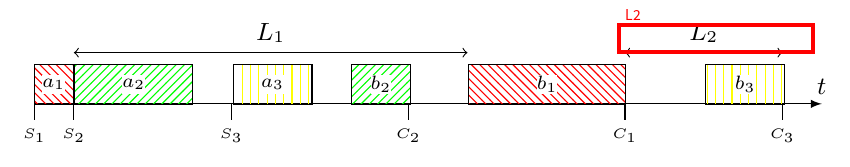

In [11]:
from vif.utils.image_utils import plot_segmentation_masks


plot_segmentation_masks(sol_image,orac_res.boxes)

In [12]:
orac_res.condition

False

In [13]:
orac_res.feedbacks


'No feature L2 interval was detected in the original image'